## import libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## import data and remove unwanted index

In [2]:
df=pd.read_csv(r'C:smoke_detection_iot.csv')

In [3]:
df.drop('Unnamed: 0',axis=1,inplace=True)
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0


### see some details about data

In [4]:
df.shape

(62630, 15)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 62630 entries, 0 to 62629
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   UTC             62630 non-null  int64  
 1   Temperature[C]  62630 non-null  float64
 2   Humidity[%]     62630 non-null  float64
 3   TVOC[ppb]       62630 non-null  int64  
 4   eCO2[ppm]       62630 non-null  int64  
 5   Raw H2          62630 non-null  int64  
 6   Raw Ethanol     62630 non-null  int64  
 7   Pressure[hPa]   62630 non-null  float64
 8   PM1.0           62630 non-null  float64
 9   PM2.5           62630 non-null  float64
 10  NC0.5           62630 non-null  float64
 11  NC1.0           62630 non-null  float64
 12  NC2.5           62630 non-null  float64
 13  CNT             62630 non-null  int64  
 14  Fire Alarm      62630 non-null  int64  
dtypes: float64(8), int64(7)
memory usage: 7.2 MB


In [6]:
df.isna().sum()

UTC               0
Temperature[C]    0
Humidity[%]       0
TVOC[ppb]         0
eCO2[ppm]         0
Raw H2            0
Raw Ethanol       0
Pressure[hPa]     0
PM1.0             0
PM2.5             0
NC0.5             0
NC1.0             0
NC2.5             0
CNT               0
Fire Alarm        0
dtype: int64

## get the date from UTC

In [7]:
df['date'] = pd.to_datetime(df['UTC'],unit='s')
df.head()

,UTC,Temperature[C],Humidity[%],TVOC[ppb],eCO2[ppm],Raw H2,Raw Ethanol,Pressure[hPa],PM1.0,PM2.5,NC0.5,NC1.0,NC2.5,CNT,Fire Alarm,date
0,1654733331,20.000,57.36,0,400,12306,18520,939.735,0.0,0.0,0.0,0.0,0.0,0,0,2022-06-09 00:08:51
1,1654733332,20.015,56.67,0,400,12345,18651,939.744,0.0,0.0,0.0,0.0,0.0,1,0,2022-06-09 00:08:52
2,1654733333,20.029,55.96,0,400,12374,18764,939.738,0.0,0.0,0.0,0.0,0.0,2,0,2022-06-09 00:08:53
3,1654733334,20.044,55.28,0,400,12390,18849,939.736,0.0,0.0,0.0,0.0,0.0,3,0,2022-06-09 00:08:54
4,1654733335,20.059,54.69,0,400,12403,18921,939.744,0.0,0.0,0.0,0.0,0.0,4,0,2022-06-09 00:08:55


## see corrolation matrix

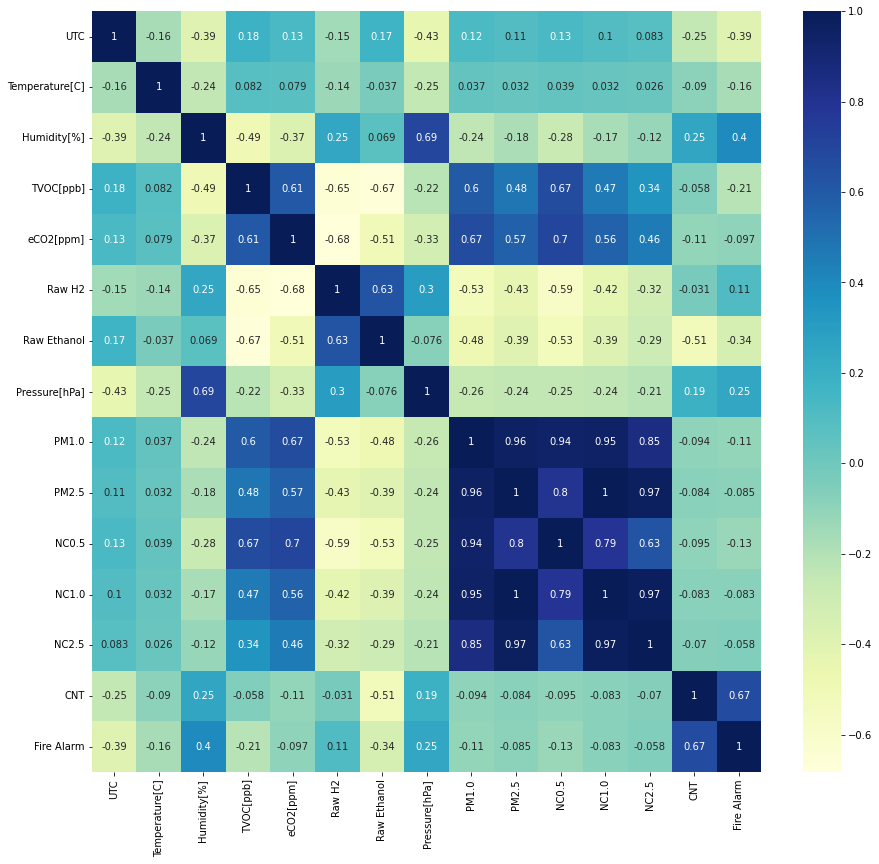

In [8]:
fig,ax=plt.subplots(figsize=(10,14))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
plt.show()

## drop date column

In [9]:
df.drop(['date'],axis=1,inplace=True)

## remove outliers from `pressure` column

In [10]:
from scipy import stats
import numpy as np
z = np.abs(stats.zscore(df['Pressure[hPa]']))
row_index=np.where(z > 3)

In [11]:
df.drop( row_index[0], inplace = True)
df.shape

(61476, 15)

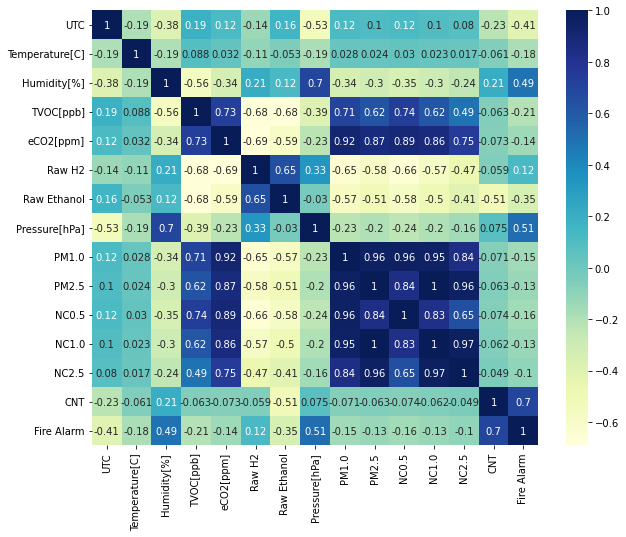

In [12]:
fig,ax=plt.subplots(figsize=(10,8))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
plt.show()

## remove outliers from `humidity` column

In [13]:
z = np.abs(stats.zscore(df['Humidity[%]']))
row_index2=np.where(z > 3)
df.drop(row_index2[0], inplace = True)

In [14]:
df.shape

(59084, 15)

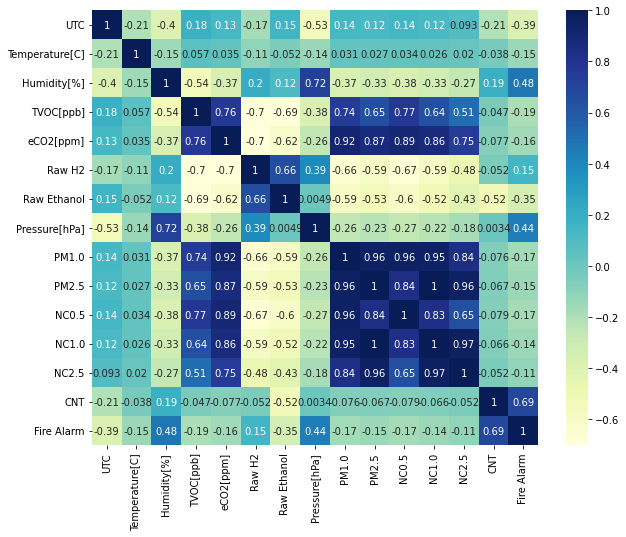

In [15]:
fig,ax=plt.subplots(figsize=(10,8))
corrMatrix = df.corr()
sns.heatmap(corrMatrix, annot=True,cmap="YlGnBu")
plt.show()

In [16]:
df['Fire Alarm'].value_counts()

1    43636
0    15448
Name: Fire Alarm, dtype: int64

## Create model

In [17]:
np.random.seed(7)
X=df.drop(['Fire Alarm'],axis=1)
y=df['Fire Alarm']

In [18]:
from sklearn.model_selection import train_test_split
np.random.seed(7)
train_x,test_x,train_y,test_y=train_test_split(X,y,test_size=0.2)

## create a `logestic regression` model

In [19]:
from sklearn.linear_model import LogisticRegression
Log_reg = LogisticRegression(max_iter=1000)
Log_reg.fit(train_x,train_y)

LogisticRegression(max_iter=1000)

In [20]:
y_pred=Log_reg.predict(test_x)

In [21]:
from sklearn.metrics import f1_score
f1_score(test_y,y_pred)

0.8491990066708867

## create a `RandomForestClassifier` model

In [22]:
from sklearn.ensemble import RandomForestClassifier
random_class=RandomForestClassifier(max_depth=5, random_state=0,n_estimators=1000)
random_class.fit(train_x,train_y)

RandomForestClassifier(max_depth=5, n_estimators=1000, random_state=0)

In [25]:
y_pred_=random_class.predict(test_x)
f1_score(test_y,y_pred_)

0.9999426572624578

## RandomForestClassifier crossvalScore

In [24]:
from sklearn.model_selection import cross_val_score
cross_scores=cross_val_score(random_class, X, y, cv=5,scoring='f1')
cross_scores

array([0.9999427 , 1.        , 0.9999427 , 1.        , 0.99977077])